In [197]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.semi_supervised import LabelPropagation
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA, PCA
from sklearn.svm import SVC
from sklearn.mixture import GMM
from sklearn import metrics

In [187]:
data = np.array([[]])
data = None
labels = []
filenames = []
for fname in glob.glob('birds_labels/part-*'):
    #print fname
    with open(fname) as f:
        for line in f:
            fname, line, label = line.strip().split(',')
            pix = np.array([[int(x) for x in line.split(' ')]])
            if data is None:
                data = np.array(pix)
                labels.append(int(label))
                filenames.append(fname)
            elif data is not None and pix.shape[1] == data.shape[1]:
                data = np.append(data,pix,axis=0)
                labels.append(int(label))
                filenames.append(fname)
print data.shape

(1098, 23040)


In [194]:
X = data / float(255)
Y = np.array(labels).reshape(X.shape[0])
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

In [235]:
n_components = 250

print("Extracting the top %d pixel features from %d features"
      % (n_components, test_data.shape[0]))

pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X)

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X)

Extracting the top 250 pixel features from 800 features
Projecting the input data on the eigenfaces orthonormal basis


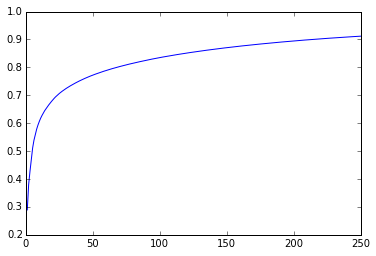

In [237]:
var = pca.explained_variance_ratio_
var.shape
var_cum = np.cumsum(var)
x_range = np.arange(250)+1
plt.plot(x_range, var_cum)

In [238]:
var_cum[249]

0.91191840756812692

In [211]:
g = open('bird_mp_0.txt')

In [204]:
line = g.readline()

In [216]:
mini_batch_size = 1000
data_ul = np.array([[]])
data_ul = None
labels_ul = []
filenames_ul = []

for i in range(mini_batch_size):
    line = g.readline()
    fname, line = line.strip().split(',')
    pix = np.array([[int(x) for x in line.split(' ')]])
    if fname in filenames:
        print fname
        continue
    if data_ul is not None and pix.shape[1] != data_ul.shape[1]:
        continue
    else:
        if data_ul is None:
            data_ul = np.array(pix)
        else:
            data_ul = np.append(data_ul,pix,axis=0)
    labels_ul.append(-1)
    filenames_ul.append(fname)
print data_ul.shape, labels_ul.shape

2636460040.jpg
2627498530.jpg
2632525780.jpg
2647882080.jpg
2627854430.jpg
2629140250.jpg


In [266]:
X_ul = data_ul / float(255)
Y_ul = np.array(labels_ul).reshape(X_ul.shape[0])
print X_ul.shape, Y_ul.shape

(994, 23040) (994,)


In [267]:
X_ul_pca = pca.transform(X_ul)
X_ul_pca.shape

(994, 250)

In [248]:
label_prop_model = LabelPropagation(kernel='knn')

In [249]:
labels = np.append(Y,Y_ul, axis=0)
comb_pc = np.append(X_train_pca, X_ul_pca, axis=0)
print comb_pc.shape, labels.shape

(2092, 250) (2092,)


In [268]:
label_prop_model.fit(comb_pc,labels)

LabelPropagation(alpha=1, gamma=20, kernel='knn', max_iter=30, n_neighbors=7,
         tol=0.001)

In [269]:
prds = label_prop_model.predict_proba(X_ul_pca)

In [271]:
prds[:10]

array([[ 0.87768988,  0.12231012],
       [ 0.87768924,  0.12231076],
       [ 0.8776824 ,  0.1223176 ],
       [ 0.87769046,  0.12230954],
       [ 0.87767902,  0.12232098],
       [ 0.87766429,  0.12233571],
       [ 0.87765794,  0.12234206],
       [ 0.8776899 ,  0.1223101 ],
       [ 0.88282507,  0.11717493],
       [ 0.87768972,  0.12231028]])

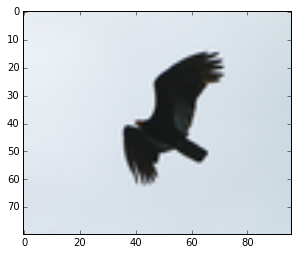

In [275]:
plt.imshow(X_ul[1].reshape(80,96,3))

In [195]:
numSample = 800
train_data, train_label = X[:numSample], Y[:numSample]
dev_data, dev_label = X[numSample:], Y[numSample:]
print "Training data shape: {}".format(train_data.shape)
print "dev data shape: {}".format(dev_data.shape)

Training data shape: (800, 23040)
dev data shape: (298, 23040)


In [10]:
def binarizeY(data):
    binarized_data = np.zeros((data.size,2))
    for j in range(0,data.size):
        feature = data[j:j+1]
        i = feature.astype(np.int64) 
        binarized_data[j,i]=1
    return binarized_data
train_label_b = binarizeY(train_label)
numClasses = train_label_b[1].size
print 'Classes = %d' %(numClasses)

Classes = 2


In [192]:
n_components = 250

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, test_data.shape[0]))

pca = RandomizedPCA(n_components=n_components, whiten=True).fit(test_data)

eigenfaces = pca.components_

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(test_data)
X_test_pca = pca.transform(dev_data)

Extracting the top 250 eigenfaces from 800 faces
Projecting the input data on the eigenfaces orthonormal basis


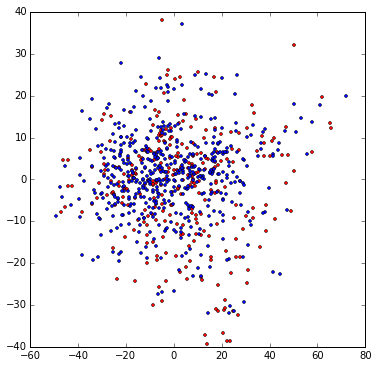

In [27]:
pca = RandomizedPCA(n_components=2)
plt.figure(figsize=(6,6))
train_pc = pca.fit_transform(train_data) # project training data to 2D
for val, col in zip(np.unique(train_label), ['r','b']):
    ix = train_label == val
    plt.plot(train_pc[ix,0], train_pc[ix,1],'o',
             markeredgecolor='black',markerfacecolor=col, markersize=3)

In [132]:
prd2 = label_prop_model.predict(train_pc)

In [148]:
print prds[:,1].argsort()[:20]
print prds[:,1].argsort()[-20:]

[755 542 451 752 467 744 461 507  57 443  58 423 726 521 211 511 328 664
 200 168]
[131 167 346 142 339 359 437 658 541 549  34 578 589 283 205 255 780 459
 501 335]


In [178]:
for i in np.arange(0,0.5,0.01):
    pos = prds[:,1] > .8 - i
    lb = train_label[pos]
    prd = np.ones((lb.shape))
    accuracy = metrics.accuracy_score(lb, prd)
    print .8 - i, accuracy, prd.shape

0.8 1.0 (6,)
0.79 0.866666666667 (15,)
0.78 0.88 (25,)
0.77 0.888888888889 (27,)
0.76 0.892857142857 (28,)
0.75 0.838709677419 (31,)
0.74 0.818181818182 (33,)
0.73 0.823529411765 (34,)
0.72 0.805555555556 (36,)
0.71 0.810810810811 (37,)
0.7 0.785714285714 (42,)
0.69 0.772727272727 (44,)
0.68 0.772727272727 (44,)
0.67 0.755555555556 (45,)
0.66 0.709090909091 (55,)
0.65 0.66265060241 (83,)
0.64 0.64 (100,)
0.63 0.641666666667 (120,)
0.62 0.616504854369 (206,)
0.61 0.6275 (400,)
0.6 0.628289473684 (608,)
0.59 0.645502645503 (756,)
0.58 0.649234693878 (784,)
0.57 0.648854961832 (786,)
0.56 0.644025157233 (795,)
0.55 0.64125 (800,)
0.54 0.64125 (800,)
0.53 0.64125 (800,)
0.52 0.64125 (800,)
0.51 0.64125 (800,)
0.5 0.64125 (800,)
0.49 0.64125 (800,)
0.48 0.64125 (800,)
0.47 0.64125 (800,)
0.46 0.64125 (800,)
0.45 0.64125 (800,)
0.44 0.64125 (800,)
0.43 0.64125 (800,)
0.42 0.64125 (800,)
0.41 0.64125 (800,)
0.4 0.64125 (800,)
0.39 0.64125 (800,)
0.38 0.64125 (800,)
0.37 0.64125 (800,)
0.36 0.

In [168]:
train_label[pos]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1])

In [191]:
pca.transform(data_ul)

array([[ -1.15640076e+04,  -3.13991144e+03,  -1.42856140e+03,
          2.10355913e+03,  -3.69868480e+03,   9.25298537e+01,
         -2.25329493e+02,  -5.38712200e+02,  -9.32173161e+02,
         -5.52234053e+02,   1.30939198e+02,  -7.32446790e+00,
          1.77374492e+02,   3.62459495e+01,   5.91437759e+01,
         -4.72324573e+01,  -3.87602000e+02,  -3.84904347e+02,
          5.73370112e+02,  -3.96620247e+02,   2.30110192e+02,
         -2.95938167e+02,  -3.77424511e+02,   6.83123928e+02,
         -6.42741649e+02,   3.08987518e+02,  -4.51864918e+02,
         -7.17976056e+02,   6.29914801e+01,  -5.14522841e+02,
          5.50284741e+02,   6.39960699e+02,   4.72018896e+01,
         -1.80744237e+02,   1.73860897e+02,  -8.07244534e+02,
          1.34740811e+02,  -1.88866109e+02,  -5.08153798e+02,
          4.69279284e+02,  -1.55381952e+02,   9.98471124e+01,
         -5.93803711e+01,   1.22301587e+02,  -6.98464347e+02,
         -2.82337817e+02,  -6.34014505e+02,  -1.85355245e+02,
        

In [291]:
t = []

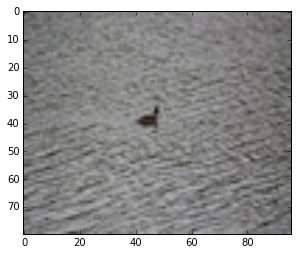

Bird? (y/n)n


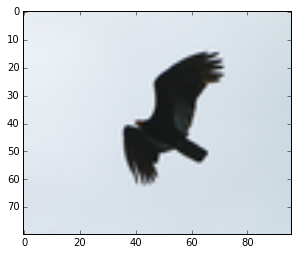

Bird? (y/n)y


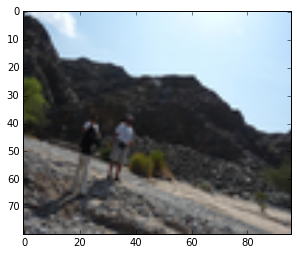

Bird? (y/n)n


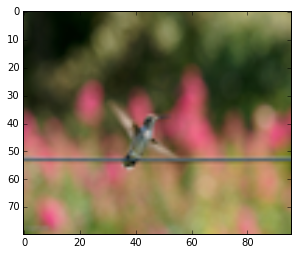

Bird? (y/n)y


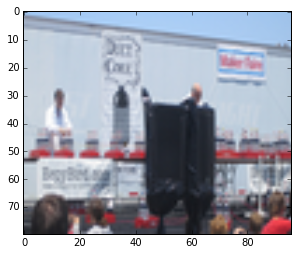

Bird? (y/n)n


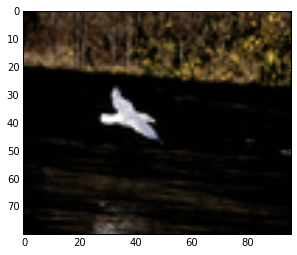

Bird? (y/n)y


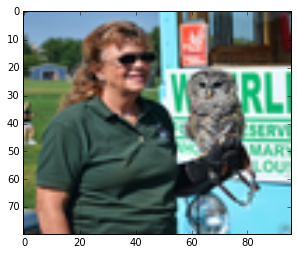

Bird? (y/n)n


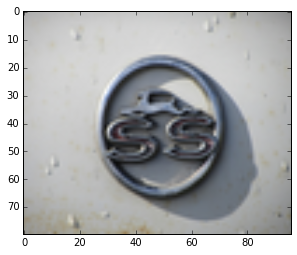

Bird? (y/n)n


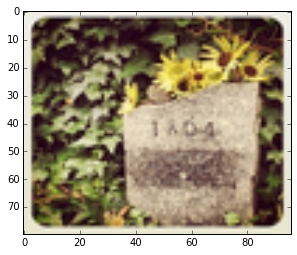

Bird? (y/n)n


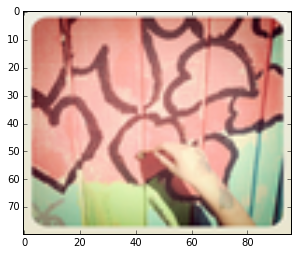

Bird? (y/n)n


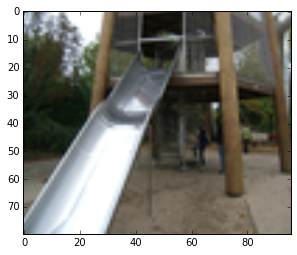

Bird? (y/n)n


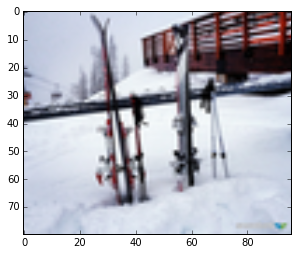

Bird? (y/n)n


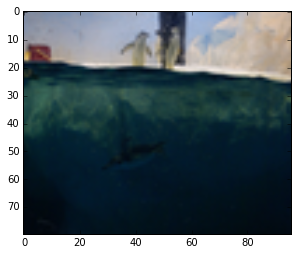

Bird? (y/n)n


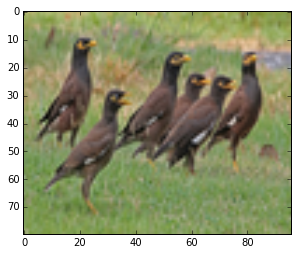

Bird? (y/n)y


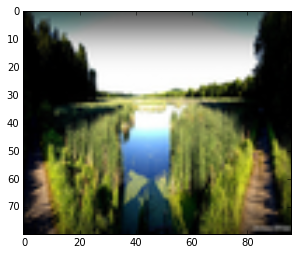

Bird? (y/n)n


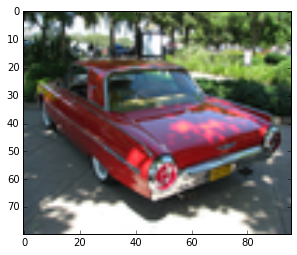

Bird? (y/n)n


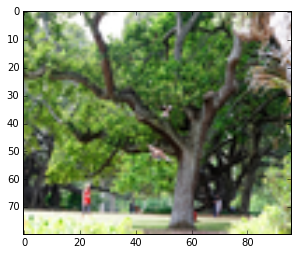

Bird? (y/n)n


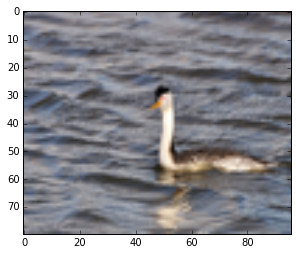

Bird? (y/n)n


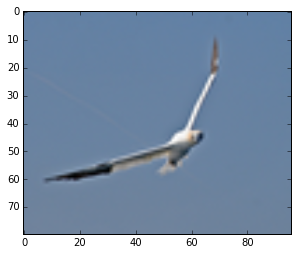

Bird? (y/n)y


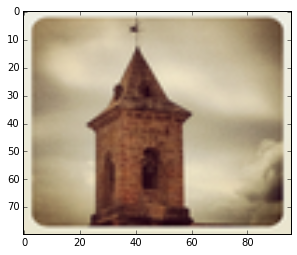

Bird? (y/n)n


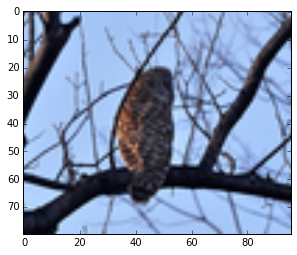

Bird? (y/n)y


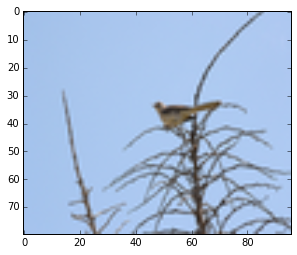

Bird? (y/n)y


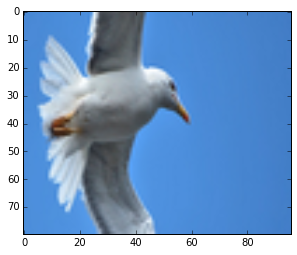

Bird? (y/n)y


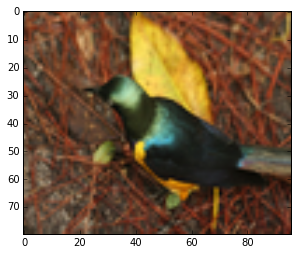

Bird? (y/n)y


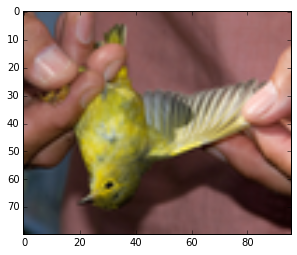

Bird? (y/n)y


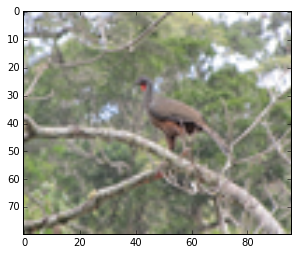

Bird? (y/n)y


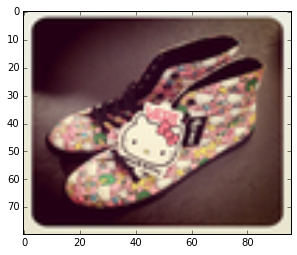

Bird? (y/n)n


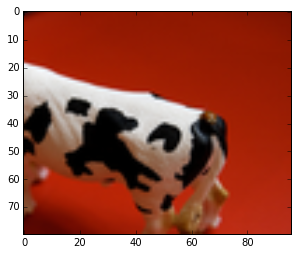

Bird? (y/n)n


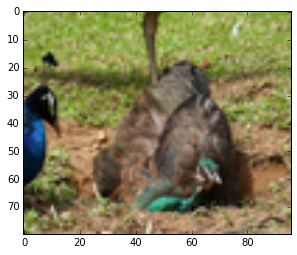

Bird? (y/n)y


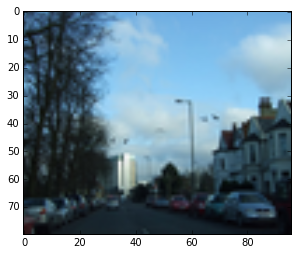

Bird? (y/n)n


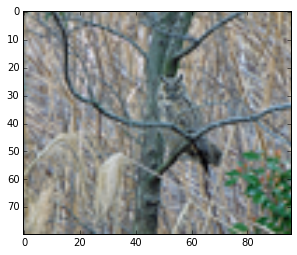

Bird? (y/n)y


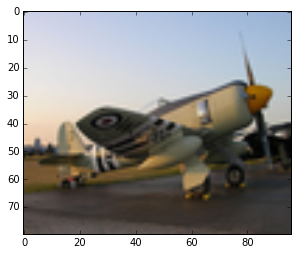

Bird? (y/n)n


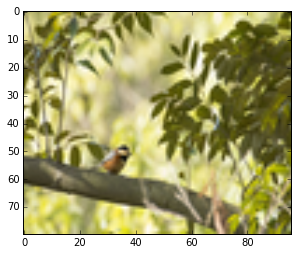

Bird? (y/n)y


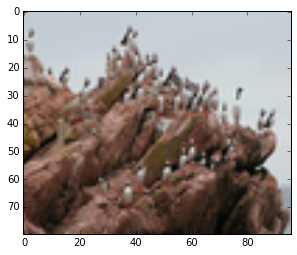

Bird? (y/n)n


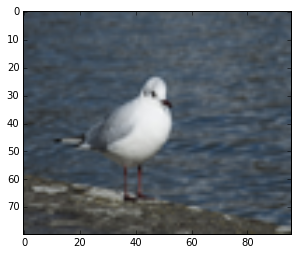

Bird? (y/n)y


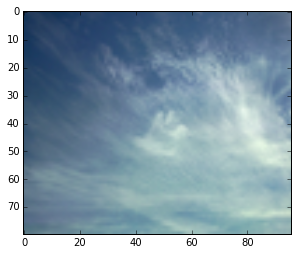

In [ ]:
for i in range(X_ul.shape[0]):
    plt.figure()
    plt.imshow(X_ul[i].reshape(80,96,3))
    plt.show()
    while True:
        inp = raw_input("Bird? (y/n)")
        if inp in ['y','n']:
            t.append(1 if inp =='y' else 0)
            break
        else:
            print "Please put in y or n."

In [289]:
t

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]